# Identifica√ß√£o

- Discente: Helder Mateus dos Reis Matos
- Matr√≠cula: 202520080003
- Disciplina: Fundamentos de Intelig√™ncia Computacional e Ci√™ncia de Dados
- Docente: Claudomiro de Souza de Sales Junior
- Tarefa: Atividade 03 - Sample distribution and sampling distribution, TLC and p-value

- Link para o Colab (modo leitura): https://colab.research.google.com/drive/1mHjHPgP7ju4_vOLvvkgrFWJwQXlS9z9b?usp=sharing

# 0. Configura√ß√µes

In [1]:
!wget -O pso.py https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade02/pso.py

--2025-05-06 01:50:03--  https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade02/pso.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4961 (4.8K) [text/plain]
Saving to: ‚Äòpso.py‚Äô

pso.py              100%[===================>]   4.84K  --.-KB/s    in 0s      

2025-05-06 01:50:03 (44.8 MB/s) - ‚Äòpso.py‚Äô saved [4961/4961]



In [2]:
import itertools
import time
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from scipy.stats import norm
import scipy.stats as stats

from pso import Particle, Swarm, ackley, particle_swarm_optimization

# 1. Sample distribution and sampling distribution

*A partir do que foi feito na Atividade 2 ‚ÄúConsiderando o primeiro trabalho, defina um experimento em que dados s√£o coletados de uma vari√°vel de interesse do seu trabalho‚Äù, crie uma popula√ß√£o artificial dessa vari√°vel com uma distribui√ß√£o Gaussiana e demonstre sample distribution and sampling distribution. Fa√ßa avalia√ß√µes de probabilidade de poss√≠veis eventos.*

Nesta atividade, a vari√°vel de interesse √© o tempo de processamento _etime_ para a execu√ß√£o do algoritmo Particle Swarm Optimization (PSO) em execu√ß√µes sobre a fun√ß√£o Ackley bidimensional. Essa vari√°vel representa o tempo decorrido entre o in√≠cio e o fim da chamada da fun√ß√£o `particle_swarm_optimization`, que depende diretamente das solu√ß√µes iniciais encontradas, da din√¢mica de atualiza√ß√£o das part√≠culas e da topologia de vizinhan√ßa adotada, podendo variar significativamente entre execu√ß√µes devido √† natureza estoc√°stica do algoritmo.

O script a seguir cria um DataFrame que detalha as execu√ß√µes do algoritmo sobre essa fun√ß√£o atrav√©s da melhor posi√ß√£o encontrada _x_ e _y_, o melhor fitness encontrado _z_, o tempo de execu√ß√£o da fun√ß√£o _etime_, e um categ√≥rico _convergence_ que indica se houve ou n√£o converg√™ncia na execu√ß√£o, considerando se a diferen√ßa entre o melhor fitness do enxame e o melhor local for da ordem de $10^{-3}$.

In [3]:
n = 1000

runs = []
etime = []

for _ in range(n):
    start_time = time.time()

    run = particle_swarm_optimization(
        cost_function=ackley,
        DIMENSIONS=2, GLOBAL_BEST=0,
        B_LO=-10, B_HI=10,
        POPULATION=20, V_MAX=0.1,
        PERSONAL_C=2.0, SOCIAL_C=2.0,
        CONVERGENCE=0.001, MAX_ITER=100
    )

    end_time = time.time()

    runs.append(run)
    etime.append(end_time - start_time)

data_pso = {
    "x": [r[0][0] for r in runs],
    "y": [r[0][1] for r in runs],
    "z": [r[1] for r in runs],
    "etime": etime,
    "convergence": ["Yes" if r[2] < 100 else "No" for r in runs],
}

df_pso = pd.DataFrame(data_pso)
df_pso

x         y         z     etime convergence
0    0.000109 -0.000155  0.000537  0.045069         Yes
1   -0.000015  0.000104  0.000298  0.030449         Yes
2   -0.000172 -0.000209  0.000768  0.042258         Yes
3    0.000250  0.000121  0.000788  0.037183         Yes
4    0.000021  0.000348  0.000990  0.057584         Yes
..        ...       ...       ...       ...         ...
995  0.000099 -0.000196  0.000621  0.032698         Yes
996 -0.000049 -0.000137  0.000413  0.034055         Yes
997  0.000157 -0.000264  0.000871  0.041186         Yes
998  0.000050 -0.000129  0.000392  0.055703         Yes
999  0.000335  0.000086  0.000981  0.046291         Yes

[1000 rows x 5 columns]

## 1.1. Sample distribution

Tomando o atributo _etime_ como a popula√ß√£o de tempos de execu√ß√£o, podemos extrair amostras da popula√ß√£o e analisar seu comportamento, sendo este o conceito de _sample distribution_. Digamos que queremos analisar uma amostra de 30 tempos de processamento aleat√≥rios da popula√ß√£o:

In [4]:
sample = df_pso["etime"].sample(30)
sample_mean = sample.mean()
sample_std = sample.std()

print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample std: {sample_std:.4f}")

Sample mean: 0.0581
Sample std: 0.0347


Os valores de m√©dia e desvio padr√£o desta amostra aleat√≥ria tem uma alta chance de divergirem dos valores calculados para uma segunda amostra de mesmo tamanho:

In [5]:
sample = df_pso["etime"].sample(30)
sample_mean = sample.mean()
sample_std = sample.std()

print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample std: {sample_std:.4f}")

Sample mean: 0.0575
Sample std: 0.0507


Uma terceira amostra tamb√©m ter√° m√©dia e desvio padr√£o diferentes:

In [6]:
sample = df_pso["etime"].sample(30)
sample_mean = sample.mean()
sample_std = sample.std()

print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample std: {sample_std:.4f}")

Sample mean: 0.0617
Sample std: 0.0466


De modo geral, diferentes amostras resultam em diferentes tend√™ncias, ou seja, uma √∫nica amostra da popula√ß√£o n√£o representa o comportamento m√©dio da mesma. √â aqui que entra a _sampling distribution_.

## 1.2. Sampling distribution

_Sampling distribution_ utiliza as m√©dias das amostras individuais com _sample distribution_. A vari√°vel `sampling` √© uma lista das m√©dias de 100 amostras de tempos de execu√ß√£o, e vai se tornar a vari√°vel de interesse para a constru√ß√£o de uma nova distribui√ß√£o.

In [7]:
sampling = [df_pso["etime"].sample(30).mean() for _ in range(100)]
sampling

[np.float64(0.06340671380360921),
 np.float64(0.059883928298950194),
 np.float64(0.05009152889251709),
 np.float64(0.04349203109741211),
 np.float64(0.06688191890716552),
 np.float64(0.06406163374582927),
 np.float64(0.05837642351786296),
 np.float64(0.08436591625213623),
 np.float64(0.07035447756449381),
 np.float64(0.0532040278116862),
 np.float64(0.06226772467295329),
 np.float64(0.06770764191945394),
 np.float64(0.06303026676177978),
 np.float64(0.05501838525136312),
 np.float64(0.07377440929412842),
 np.float64(0.04980365435282389),
 np.float64(0.053177229563395184),
 np.float64(0.0526520570119222),
 np.float64(0.06508278052012126),
 np.float64(0.06528391043345133),
 np.float64(0.05715763568878174),
 np.float64(0.06968491872151693),
 np.float64(0.05359052817026774),
 np.float64(0.05431749820709229),
 np.float64(0.05335082213083903),
 np.float64(0.06087801456451416),
 np.float64(0.06580930550893148),
 np.float64(0.0647519588470459),
 np.float64(0.058896907170613605),
 np.float64(0.

De posse dessas m√©dias, podemos fazer um estudo da distribui√ß√£o das frequ√™ncias destas m√©dias e verificar se esta se aproxima de uma fun√ß√£o gaussiana. A fun√ß√£o `histogram_experiment()` recebe como par√¢metro principal as m√©dias extra√≠das, computa os valores de m√©dia da popula√ß√£o _mu_ e desvio padr√£o da popula√ß√£o _sigma_, e realiza o ajuste de uma distribui√ß√£o normal em rela√ß√£o aos valores encontrados de _mu_ e _sigma_. Como podemos ver na Figura abaixo, a curva normal fitada acompanha a distribui√ß√£o de frequ√™ncias de um histograma de 10 bins, indicando que a nova distribui√ß√£o normal pode ser utilizada para extrair novas amostras de popula√ß√£o ou como entrada para testes estat√≠sticos que validem a signific√¢ncia estat√≠stica da distribui√ß√£o.

<Axes: title={'center': 'Distribui√ß√£o de etime'}>

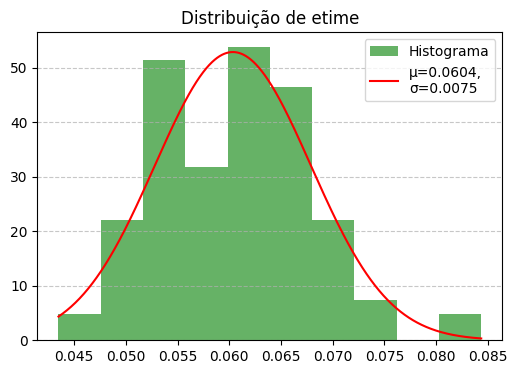

In [8]:
def histogram_experiment(s, title: str, ax: plt.Axes = None):

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    ax.hist(s, bins=10, density=True, alpha=0.6, color='g', label="Histograma")

    mu, sigma = norm.fit(s)
    x = np.linspace(min(s), max(s), 1000)
    pdf = norm.pdf(x, mu, sigma)

    ax.plot(x, pdf, 'r-', label=f"Œº={mu:.4f},\nœÉ={sigma:.4f}")

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_title(title)

    ax.legend(loc='upper right', fontsize=10)

    return ax

histogram_experiment(sampling, "Distribui√ß√£o de etime")

# 2. TLC

_Aplique o TLC a fun√ß√£o de distribui√ß√£o gama e avalie quatro diferentes tamanhos de amostra, come√ßando em 10._

O Teorema do Limite Central (TLC) consiste em extrair e analisar estatisticamente uma gaussiana a partir da coleta das tend√™ncias centrais de uma distribui√ß√£o original. Para aplicar o TLC √† distribui√ß√£o gamma, √© importante conhecer seus par√¢metros:

- _shape_: controla a forma da distribui√ß√£o, ou seja, a sua assimetria. Quanto maior, mais a curva se aproxima de uma normal.
- _scale_: estica ou comprime a distribui√ß√£o no eixo horizontal, controlando a dispers√£o dos valores.

Para os mesmos par√¢metros de amostra de 1000 elementos e de tamanho 30 aplicados na fun√ß√£o gamma, √© poss√≠vel extrair uma gaussiana com as m√©dias das amostras. Para amostras colhidas de uma fun√ß√£o gamma com $shape = 2$ e $scale = 1$, a m√©dia e desvio padr√£o da gaussiana resultante se aproximam de $2$ e $0.2$, respectivamente, como mostra a Figura abaixo:

<Axes: title={'center': 'Frequ√™ncias de gamma para shape = 2 e scale = 1'}>

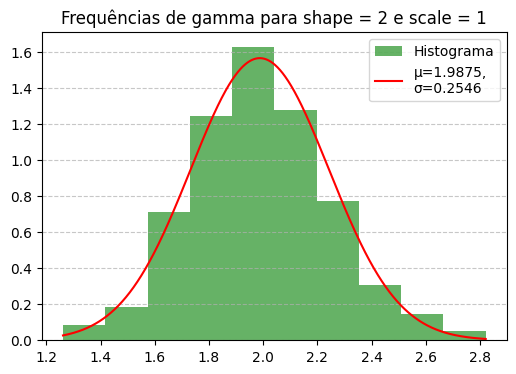

In [9]:
gamma_shape = 2
gamma_scale = 1

n_samples = 1000
sample_size = 30

gamma_means = [np.mean(np.random.gamma(gamma_shape, gamma_scale, sample_size)) for _ in range(n_samples)]

histogram_experiment(gamma_means, f"Frequ√™ncias de gamma para shape = {gamma_shape} e scale = {gamma_scale}")

Para efeitos de escalabilidade do tamanho das amostras e dos intervalos de par√¢metros, a fun√ß√£o `histogram_grid()` cria uma grid de dimens√£o igual a quantidade de valores de _shape_ e _scale_ de interesse. A figura abaixo mostra a aplica√ß√£o do TLC para as diferentes combina√ß√µes de valores dos dois par√¢metros para um intervalo entre 1 e 3 inclusivos, considerando amostras de tamanho 10. Note que, mesmo diante da varia√ß√£o dos par√¢metros da fun√ß√£o, as m√©dias tendem a um valor pr√≥ximo ao denotado na primeira Figura, 2. Entretanto, os valores de desvios padr√£o aumentaram, chegando a uma ordem de $4 \times 10^{-1}$.

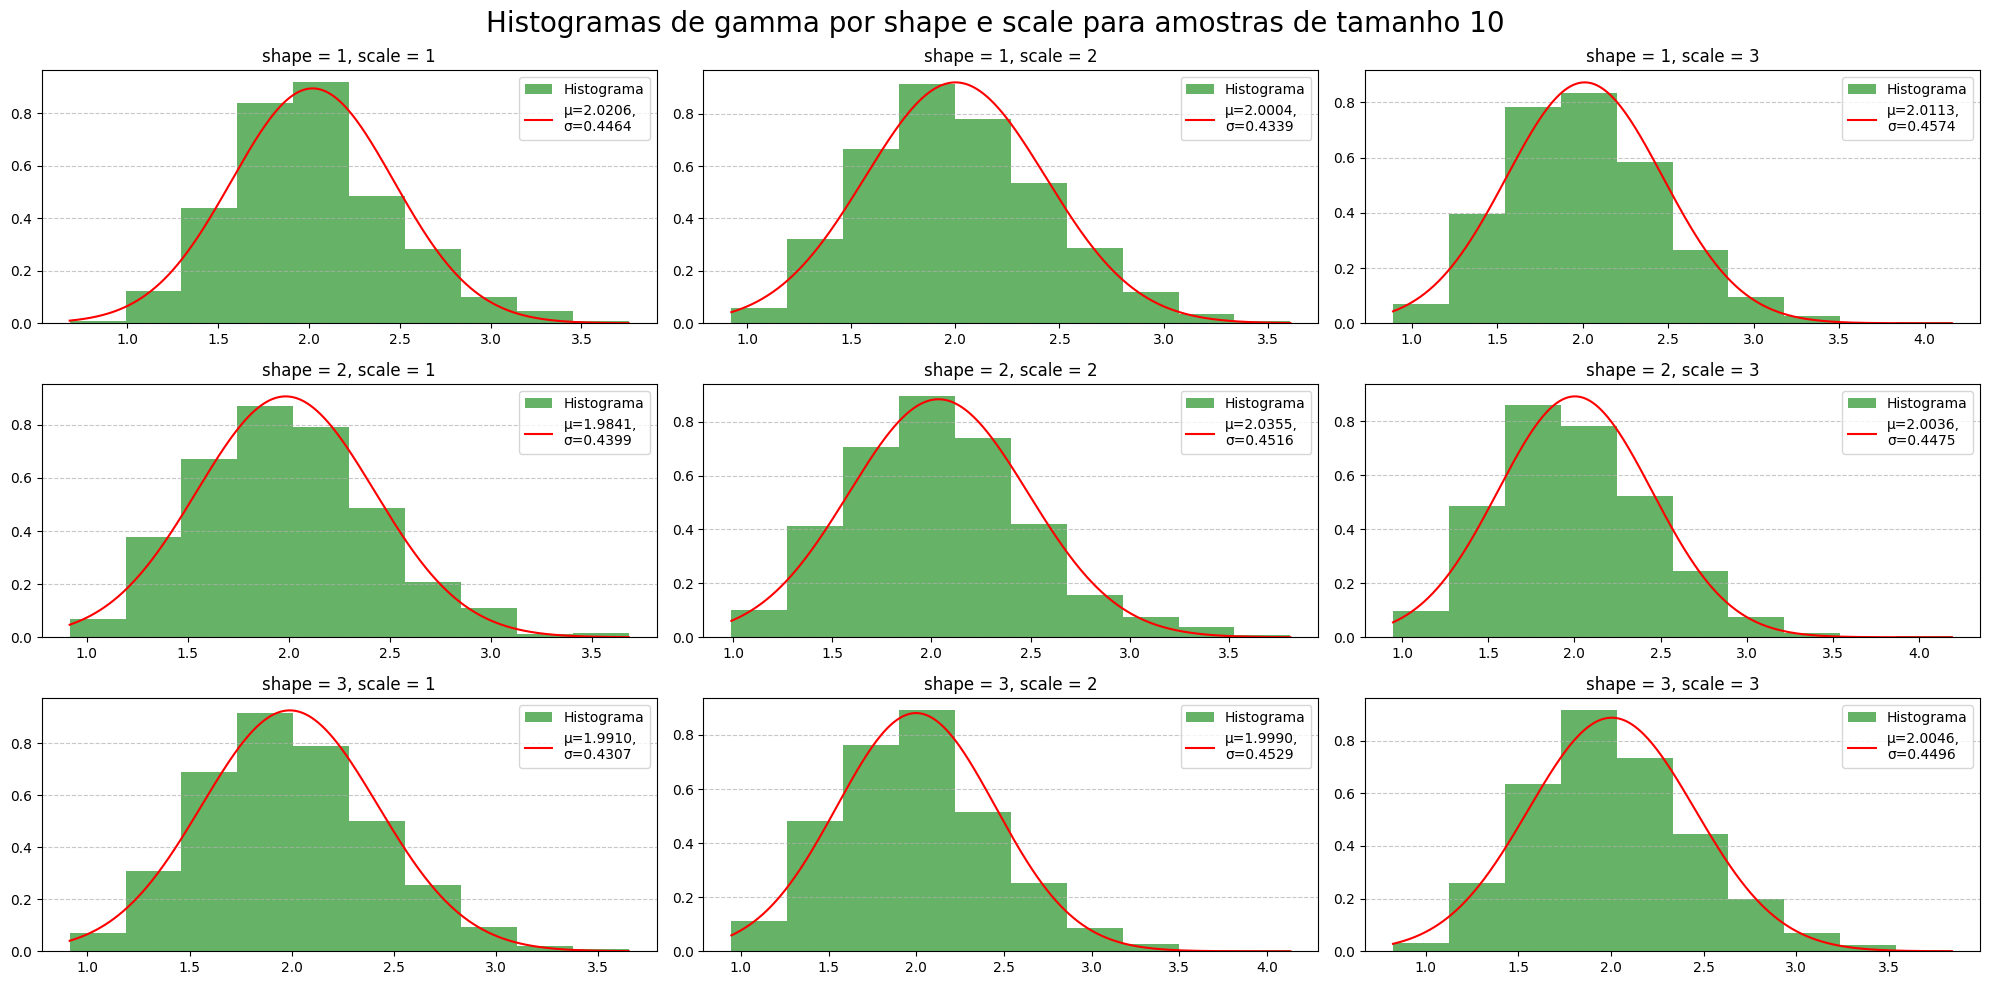

In [10]:
def histogram_grid(min_gshape: int, max_gshape: int, min_gscale: int, max_gscale: int, sample_size: int = 10, n_samples: int = 1000):

    nrows = max_gshape - min_gshape + 1
    ncols = max_gscale - min_gscale + 1

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

    gshape = min_gshape
    gscale = min_gscale

    for i, j in itertools.product(range(nrows), range(ncols)):
        gamma_means = [np.mean(np.random.gamma(gamma_shape, gamma_scale, sample_size)) for _ in range(n_samples)]
        histogram_experiment(gamma_means, f"shape = {gshape}, scale = {gscale}", axs[i][j])
        gscale += 1
        if gscale > max_gscale:
            gshape += 1
            gscale = min_gscale

    fig.suptitle(f"Histogramas de gamma por shape e scale para amostras de tamanho {sample_size}", fontsize=20)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    fig.tight_layout()
    return fig, axs

histogram_grid(
    min_gshape=1, max_gshape=3,
    min_gscale=1, max_gscale=3,
    sample_size=10, n_samples=1000
);

Vamos aumentar o tamanho das amostras, agora com 100 elementos cada. A m√©dia das gaussianas manteve-se em torno de 2, enquanto que os desvios padr√£o diminuiram, agora concentrados perto de 0.14. Com mais amostras na popula√ß√£o, o grau de incertezas associados √† escolha de valores pr√≥ximos aos extremos da distribui√ß√£o original diminui, resultando em um intervalo de desvio menor.

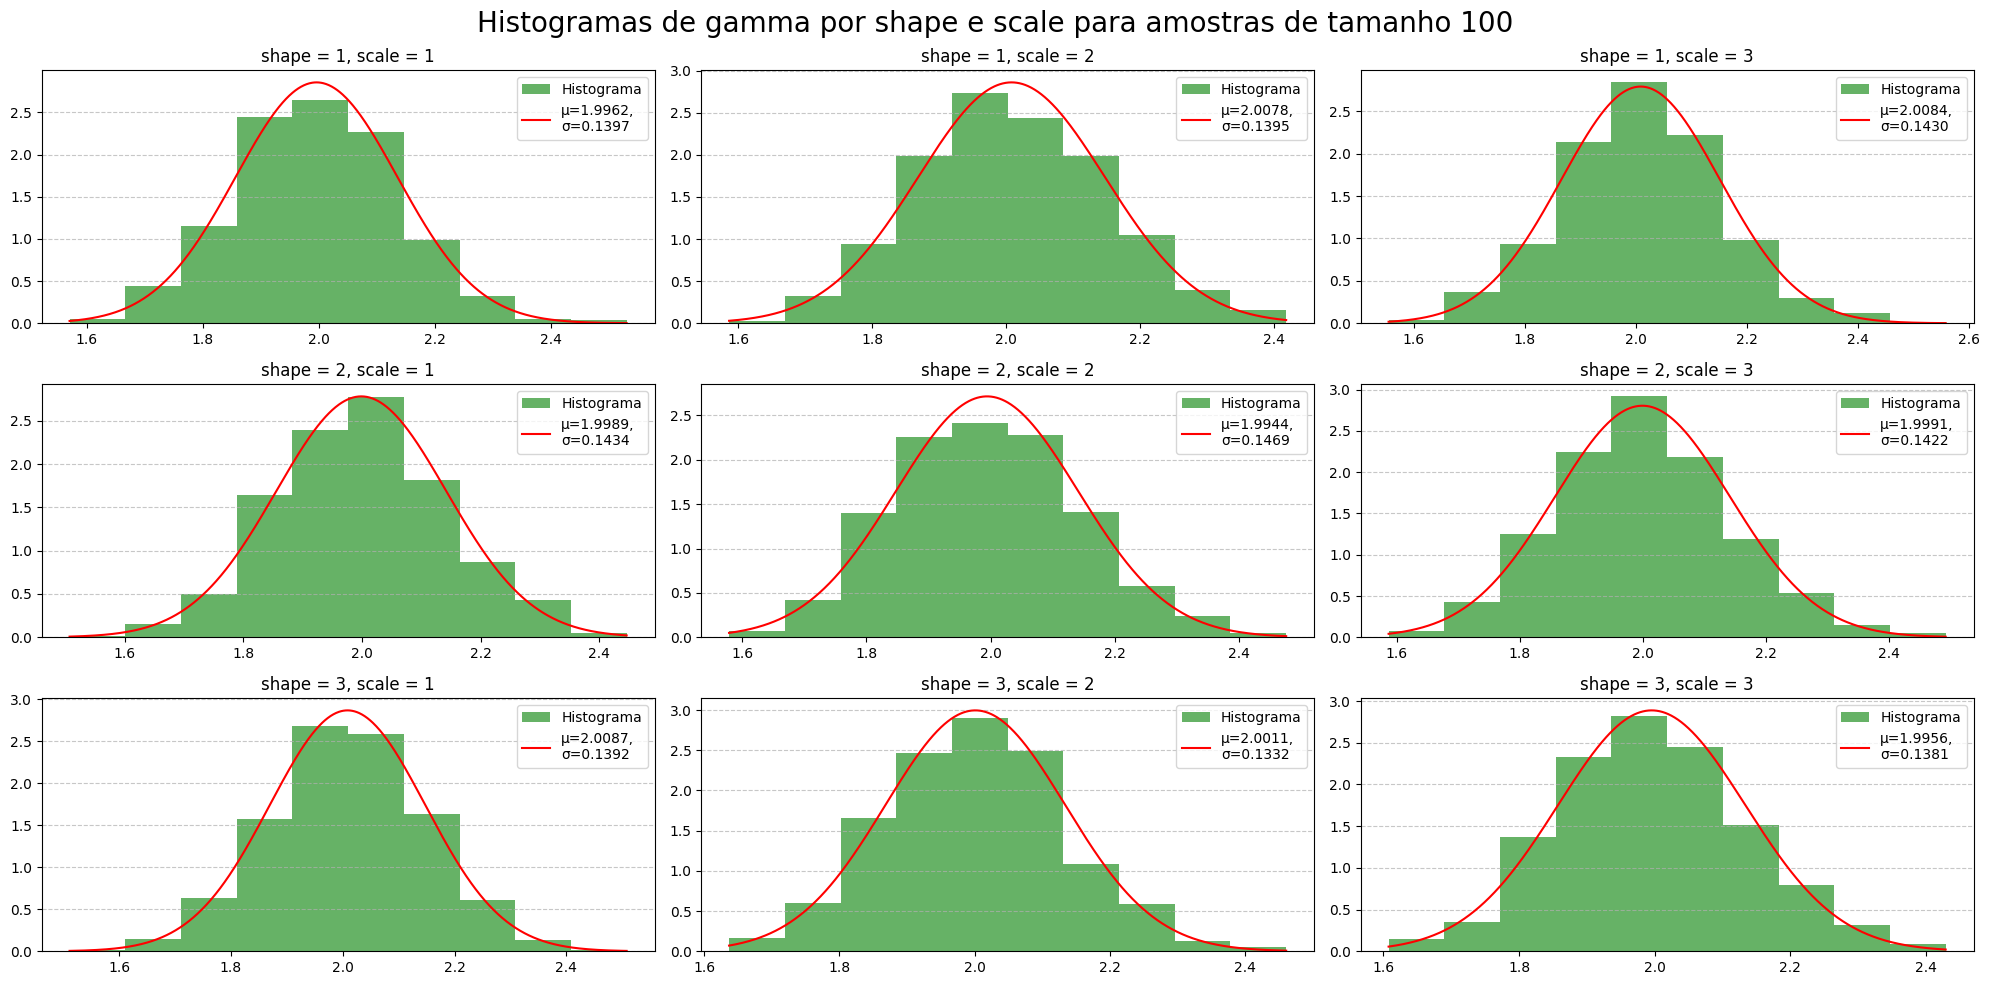

In [11]:
histogram_grid(
    min_gshape=1, max_gshape=3,
    min_gscale=1, max_gscale=3,
    sample_size=100, n_samples=1000
);

Mais uma vez aumentando a escala do tamanho da amostras, desta vez para $10^3$, as m√©dias mant√©m suas tend√™ncias, enquanto que os desvios padr√£o diminuem.

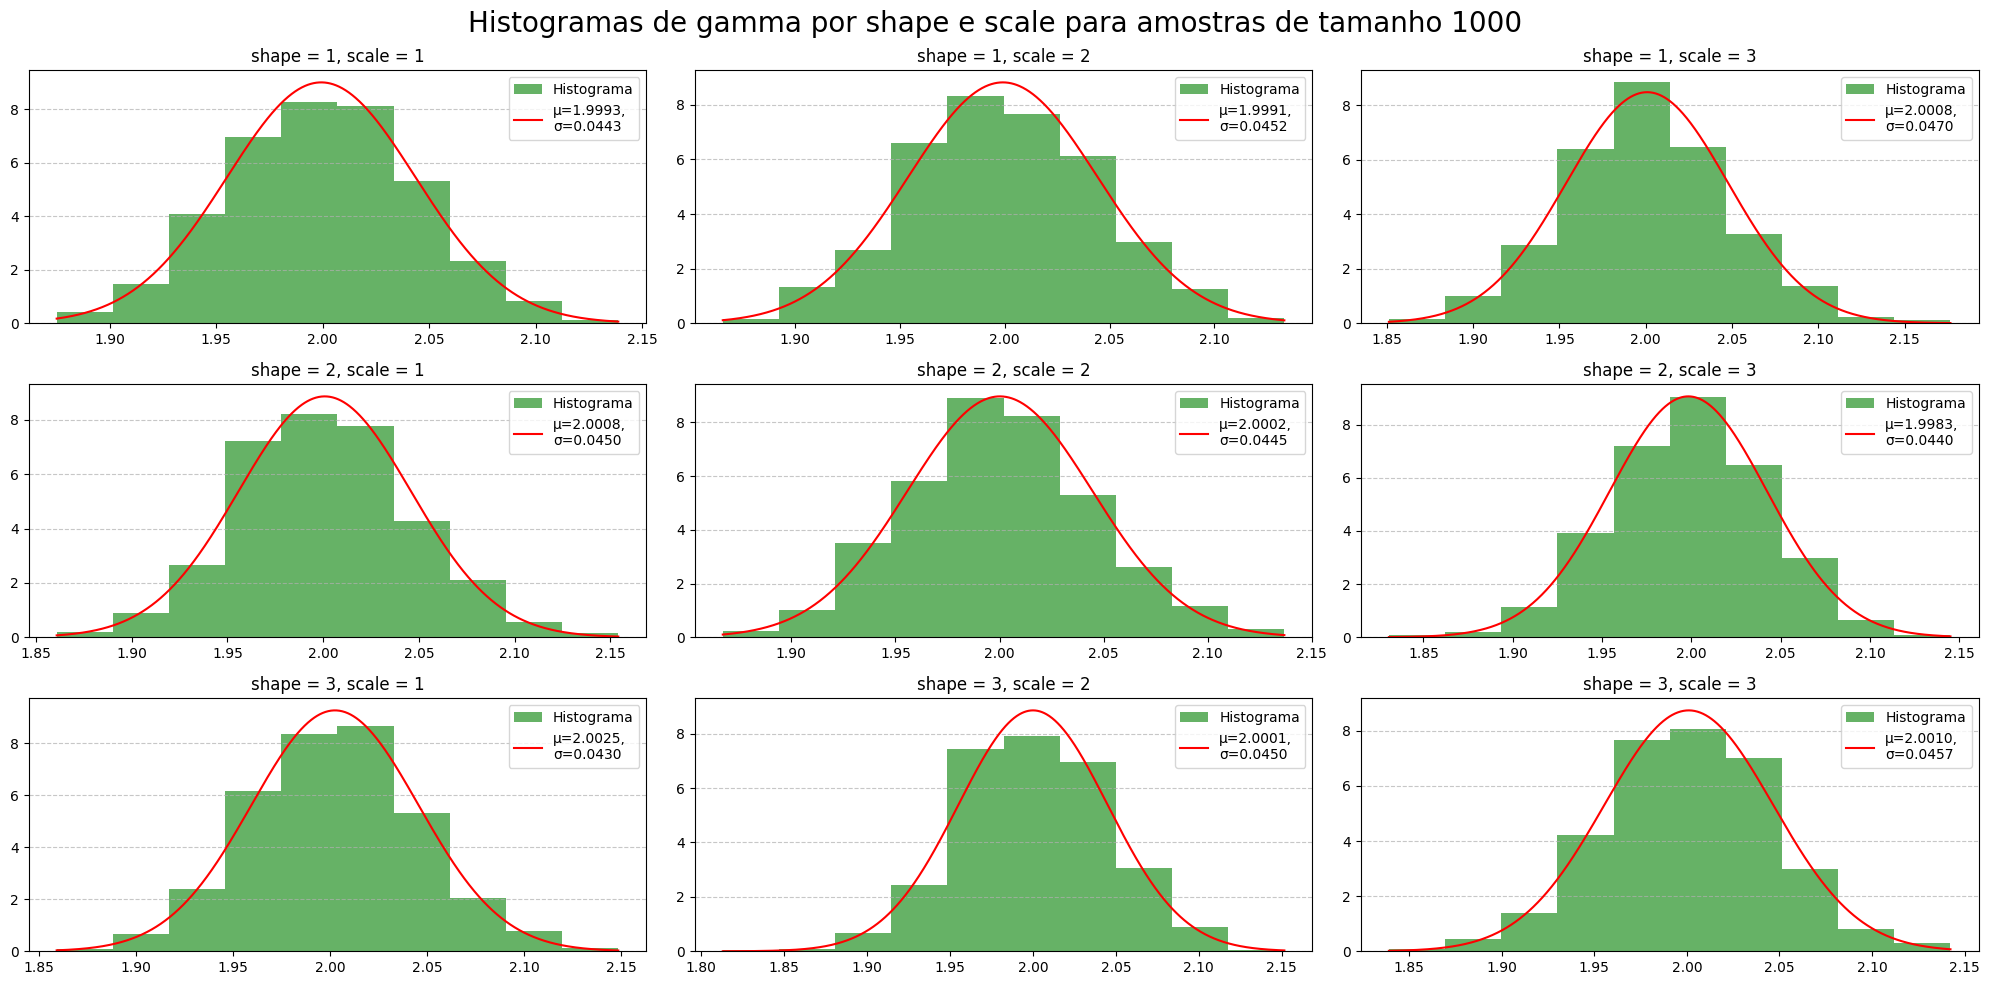

In [12]:
histogram_grid(
    min_gshape=1, max_gshape=3,
    min_gscale=1, max_gscale=3,
    sample_size=1_000, n_samples=1000
);

Indo para escala ainda maiores, como em $10^6$, as observa√ß√µes se mant√©m. Desta forma, √© poss√≠vel afirmar que, o tamanho da amostra impacta diretamente no grau de certeza de que amostras aleat√≥rias da distribui√ß√£o original tenha seus valores pr√≥ximos aos valores mais frequentes da mesma.

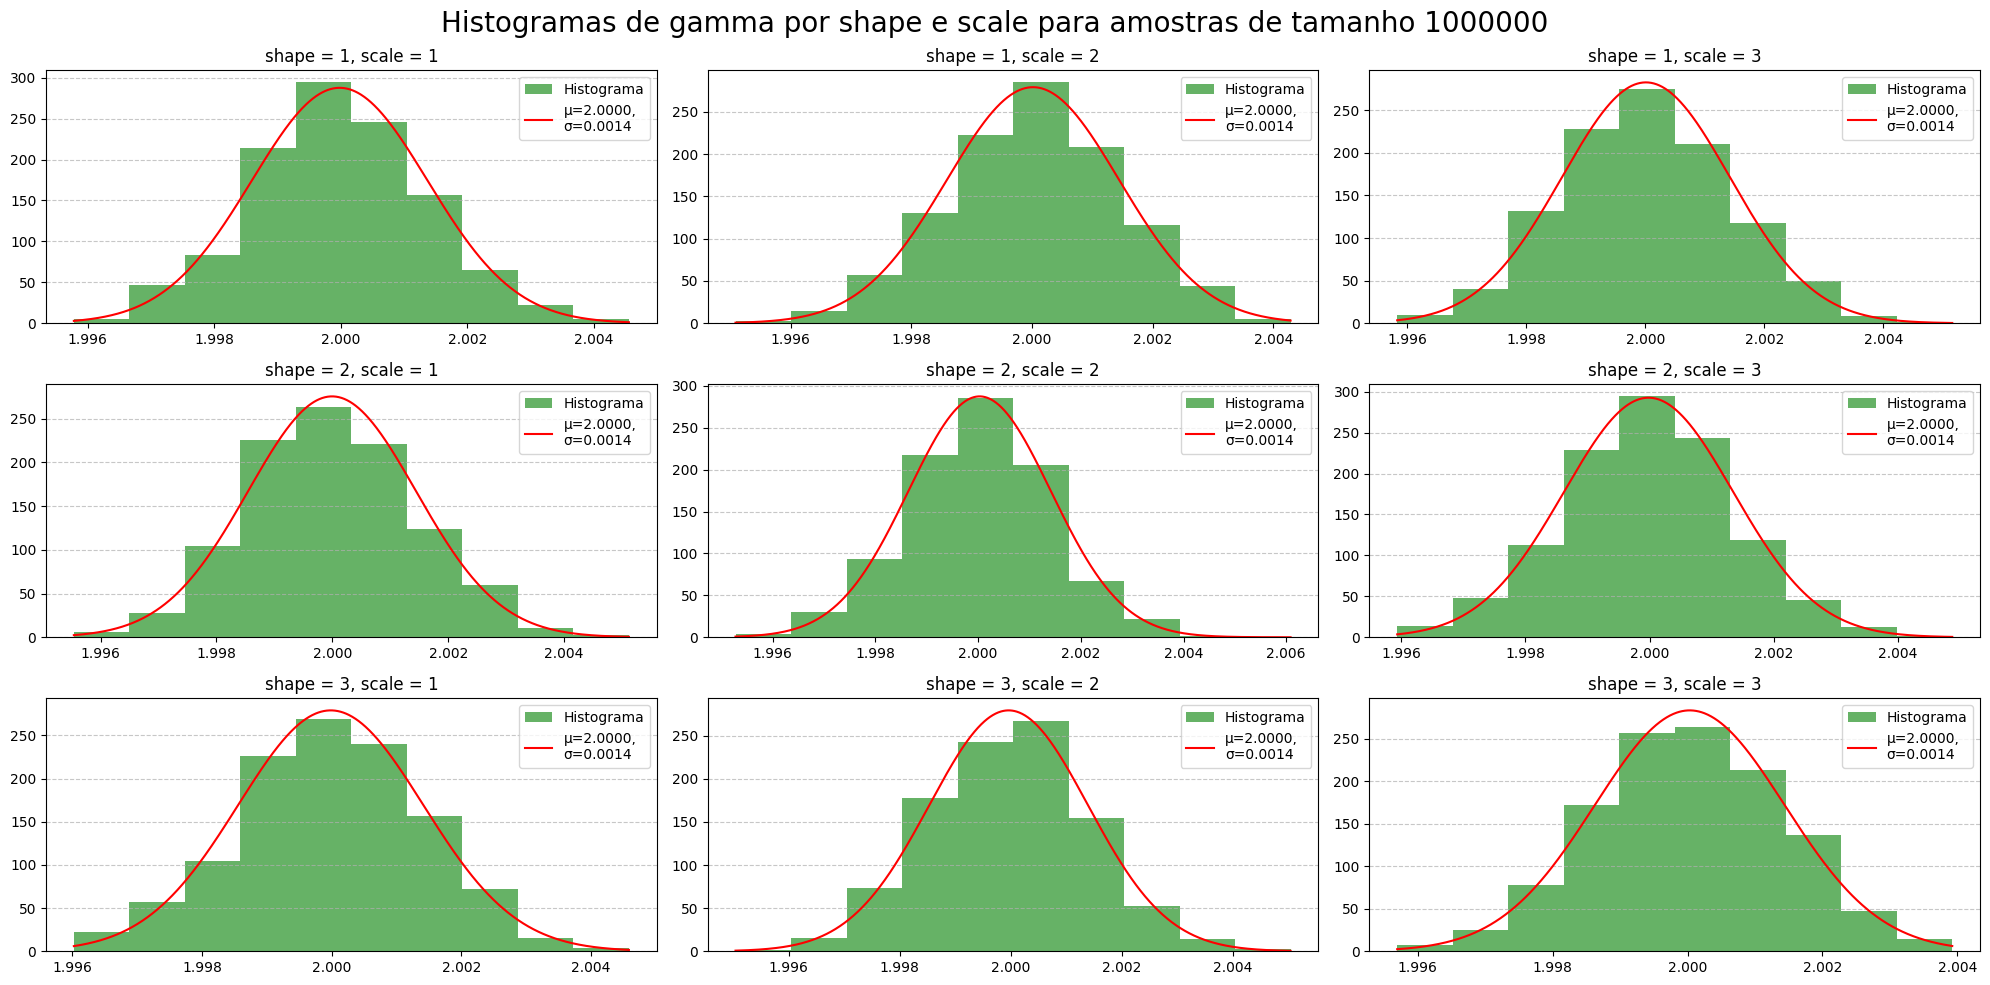

In [13]:
histogram_grid(
    min_gshape=1, max_gshape=3,
    min_gscale=1, max_gscale=3,
    sample_size=1_000_000, n_samples=1000
);

# 3. p-value

_Fa√ßa um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo._

<p align="center">
  <img src="https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade03/imagens/c.png" alt="Imagem da Atividade 03" width="600">
</p>

O evento pode ser descrito como o lan√ßamento de 5 moedas, em que uma delas resulte em _"tail"_. Podemos levantar a seguinte hip√≥tese nula:

$H_{0}$: as moedas s√£o justas.

Ou seja, espera-se que a probabilidade dos dois poss√≠veis resultados do lan√ßamento de uma moeda sejam de 50%. Assim, podemos calcular o p-value para o evento descrito e, consequentemente, confirmar de que este n√£o pode acontecer por acaso.

A fun√ß√£o `all_flip_outcomes()` utiliza uma classe da biblioteca itertools do Python para obter o produto cartesiano das combina√ß√µes de _heads_ e _tails_ do experimento. Para fins did√°ticos, vou tratar _heads_ como ü•á e _tails_ como ü•à. O DataFrame `df_tosses` cont√©m todos os $2^{5} = 32$ poss√≠veis eventos ou cen√°rios alcan√ß√°veis ao se jogar 5 moedas.

In [14]:
def all_flip_outcomes(n_coins):
    return np.array(list(itertools.product(["ü•á", "ü•à"], repeat=n_coins)))

n_coins = 5
outcomes = all_flip_outcomes(n_coins)

df_tosses = pd.DataFrame(outcomes, columns=[f"c{i+1}" for i in range(n_coins)])
df_tosses

c1 c2 c3 c4 c5
0   ü•á  ü•á  ü•á  ü•á  ü•á
1   ü•á  ü•á  ü•á  ü•á  ü•à
2   ü•á  ü•á  ü•á  ü•à  ü•á
3   ü•á  ü•á  ü•á  ü•à  ü•à
4   ü•á  ü•á  ü•à  ü•á  ü•á
5   ü•á  ü•á  ü•à  ü•á  ü•à
6   ü•á  ü•á  ü•à  ü•à  ü•á
7   ü•á  ü•á  ü•à  ü•à  ü•à
8   ü•á  ü•à  ü•á  ü•á  ü•á
9   ü•á  ü•à  ü•á  ü•á  ü•à
10  ü•á  ü•à  ü•á  ü•à  ü•á
11  ü•á  ü•à  ü•á  ü•à  ü•à
12  ü•á  ü•à  ü•à  ü•á  ü•á
13  ü•á  ü•à  ü•à  ü•á  ü•à
14  ü•á  ü•à  ü•à  ü•à  ü•á
15  ü•á  ü•à  ü•à  ü•à  ü•à
16  ü•à  ü•á  ü•á  ü•á  ü•á
17  ü•à  ü•á  ü•á  ü•á  ü•à
18  ü•à  ü•á  ü•á  ü•à  ü•á
19  ü•à  ü•á  ü•á  ü•à  ü•à
20  ü•à  ü•á  ü•à  ü•á  ü•á
21  ü•à  ü•á  ü•à  ü•á  ü•à
22  ü•à  ü•á  ü•à  ü•à  ü•á
23  ü•à  ü•á  ü•à  ü•à  ü•à
24  ü•à  ü•à  ü•á  ü•á  ü•á
25  ü•à  ü•à  ü•á  ü•á  ü•à
26  ü•à  ü•à  ü•á  ü•à  ü•á
27  ü•à  ü•à  ü•á  ü•à  ü•à
28  ü•à  ü•à  ü•à  ü•á  ü•á
29  ü•à  ü•à  ü•à  ü•á  ü•à
30  ü•à  ü•à  ü•à  ü•à  ü•á
31  ü•à  ü•à  ü•à  ü•à  ü•à

O p-value do evento que queremos calcular √© composto pela soma de 3 parcelas:

- Probabilidade da observa√ß√£o.
- Probabilidade dos eventos igualmente raros.
- Probabilidade dos eventos ainda mais raros.

## 3.1. Probabilidade da observa√ß√£o

Dentre os 32 cen√°rios, quais se encaixam exatamamente na descri√ß√£o da observa√ß√£o a ser estudada? Para responder isso, selecionamos as linhas de `df_tosses` em que a soma das medalhas ü•à correspondentes aos _tails_ √© igual a 1.

In [15]:
df_observation = df_tosses[df_tosses.eq("ü•à").sum(axis=1) == 1]
df_observation

c1 c2 c3 c4 c5
1   ü•á  ü•á  ü•á  ü•á  ü•à
2   ü•á  ü•á  ü•á  ü•à  ü•á
4   ü•á  ü•á  ü•à  ü•á  ü•á
8   ü•á  ü•à  ü•á  ü•á  ü•á
16  ü•à  ü•á  ü•á  ü•á  ü•á

Dividindo a quantidade de eventos poss√≠veis que descrevem a observa√ß√£o pela quantidade total de eventos, temos a probabilidade da observa√ß√£o.

In [16]:
observation_probability = len(df_observation) / len(outcomes)
observation_probability

0.15625

## 3.2. Probabilidade de eventos igualmente raros

Agora analisamos o outro lado da moeda, onde a soma das medalhas ü•á √© igual a 1, descrevendo o evento igualmente prov√°vel de acontecer, que √© sair apenas uma _head_.

In [17]:
df_equally_rare = df_tosses[df_tosses.eq("ü•á").sum(axis=1) == 1]
df_equally_rare

c1 c2 c3 c4 c5
15  ü•á  ü•à  ü•à  ü•à  ü•à
23  ü•à  ü•á  ü•à  ü•à  ü•à
27  ü•à  ü•à  ü•á  ü•à  ü•à
29  ü•à  ü•à  ü•à  ü•á  ü•à
30  ü•à  ü•à  ü•à  ü•à  ü•á

Novamente, encontramos a probabilidade associada pela raz√£o entre o n√∫mero de eventos obsevados e o n√∫mero de eventos totais.

In [18]:
equally_rare_probability = len(df_equally_rare) / len(outcomes)
equally_rare_probability

0.15625

## 3.3. Probabilidade de eventos ainda mais raros

A √∫ltima parcela do p-value considera os eventos ainda mais raros que a observa√ß√£o. Se apenas uma ü•à ser escolhida dentre as 5 j√° √© um evento raro, algo mais raro ainda de acontecer √© que todas as moedas sejam ü•á (e vice-versa). Assim, vou filtrar `df_tosses` pela uni√£o de ambos os cen√°rios ainda mais raros.

In [19]:
df_rarer = df_tosses[(df_tosses.eq("ü•à").sum(axis=1) == 5) | (df_tosses.eq("ü•á").sum(axis=1) == 5)]
df_rarer

c1 c2 c3 c4 c5
0   ü•á  ü•á  ü•á  ü•á  ü•á
31  ü•à  ü•à  ü•à  ü•à  ü•à

Assim, encontramos a probabilidade desses eventos raros.

In [20]:
rarer_probability = len(df_rarer) / len(outcomes)
rarer_probability

0.0625

## 3.4. Soma das probabilidades (p-value)

Por fim, o p-value pode ser calculado pela soma das probabilidades da observa√ß√£o, das observa√ß√µes igualmente prov√°veis, e das probabilidades ainda mais raras que a observa√ß√£o.

Para o lan√ßamento de 5 moedas, obter apenas uma ü•à implica em um p-value de 0.375. Em outras palavras, h√° uma probabilidade de 37,5% de observar esse resultado ou um resultado igualmente ou ainda mais raro. Como este valor est√° acima do limiar de signific√¢ncia estat√≠stica de 5%, isso significa que n√£o h√° evid√™ncias suficientes contra a aleatoriedade ou justi√ßa das moedas, baseada nas permuta√ß√µes de ü•áü•áü•áü•áü•à.

In [21]:
p_value = observation_probability + equally_rare_probability + rarer_probability
p_value

0.375

# 4. p-value

_Crie  duas  Gaussianas  como  mostrado  abaixo  (√©  s√≥  variar  a m√©dia). Sortei 100 sequ√™ncias de tr√™s valores na azul e para cada sequ√™ncia calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra √© calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%)._

<p align="center">
  <img src="https://raw.githubusercontent.com/hellsdeur/ficcd-ppgcc-2025/refs/heads/main/atividade03/imagens/d.png" alt="Imagem da Atividade 03" width="600">
</p>

Interpreta√ß√£o estat√≠stica:

- Hip√≥tese nula ($H_{0}$): os dados v√™m da distribui√ß√£o vermelha.
- Hip√≥tese alternativa ($H_{1}$): os dados v√™m de outra distribui√ß√£o --- no caso, a azul.
- Como os dados realmente v√™m da azul, a hip√≥tese nula √© falsa.
Quando o p-valor $> 0.05$, n√£o rejeitamos a hip√≥tese nula.
- Portanto, estamos comentendo um falso negativo (erro tipo II): a hip√≥tese nula √© falsa, mas n√£o a rejeitamos.

# 4.1. Distribui√ß√µes gaussianas

As gaussianas escolhidas podem ser descritas por:

1. Vermelha: $\mu=0$; $\sigma=1$
2. Azul: $\mu=1$; $\sigma=1$

A Figura a seguir mostra o formato das duas distribui√ß√µes:

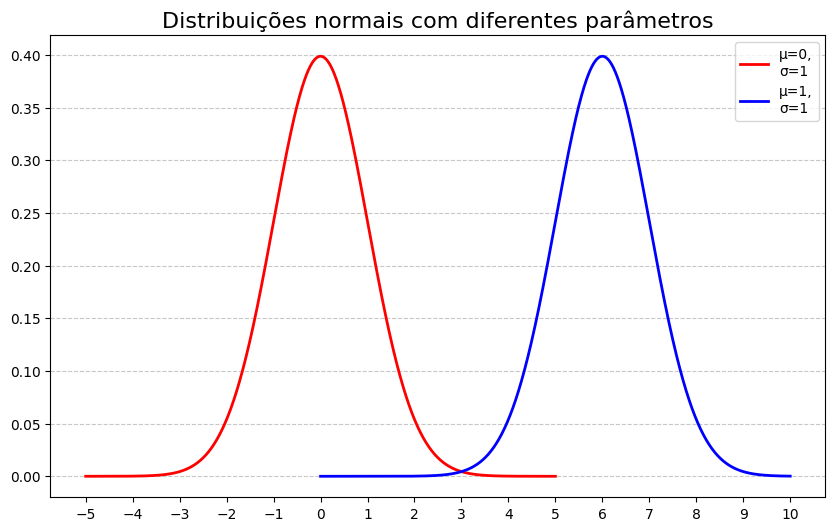

In [22]:
fig_d, ax_d = plt.subplots(figsize=(10, 6))

mu1, sigma1 = 0, 1
mu2, sigma2 = 1, 1

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(0, 10, 1000)

pdf1 = norm.pdf(x1, mu1, sigma1)
pdf2 = norm.pdf(x1, mu2, sigma2)

ax_d.plot(x1, pdf1, 'r-', linewidth=2, label=f"Œº={mu1},\nœÉ={sigma1}")
ax_d.plot(x2, pdf2, 'b-', linewidth=2, label=f"Œº={mu2},\nœÉ={sigma2}")

ax_d.grid(axis='y', linestyle='--', alpha=0.7)

ax_d.set_xticks(np.arange(-5, 11, 1))

ax_d.set_title("Distribui√ß√µes normais com diferentes par√¢metros", fontsize=16)

ax_d.legend(loc='upper right', fontsize=10)

fig_d.show()

# 4.2. Sampling distribution

A partir da distribui√ß√£o 2, √© poss√≠vel realizar o _sampling_ de 100 amostras de tamanho 3 cada.

In [23]:
sampling = np.random.normal(mu2, sigma2, (100, 3))
sampling

array([[ 2.89549200e-01,  1.23187426e+00,  9.29731418e-01],
       [ 3.22991845e+00,  2.71470118e-01,  1.82248373e-01],
       [ 1.98181872e+00, -8.11908293e-01, -1.76957664e-01],
       [ 8.64943218e-01,  1.73399659e+00,  1.71917070e+00],
       [ 1.20300186e+00, -2.64654437e-01,  1.55919664e+00],
       [ 1.82569616e+00,  1.08431269e+00,  2.56449437e+00],
       [ 9.79426369e-01,  2.18279721e+00,  1.29905554e+00],
       [ 4.78497789e-01, -6.21253197e-01,  2.84790220e+00],
       [ 7.18059685e-01, -1.31381612e+00,  1.27001251e+00],
       [ 1.48124083e+00,  1.74149743e+00,  7.27734780e-01],
       [-4.05685419e-01,  2.12596143e+00, -1.65382934e-01],
       [ 2.23942419e+00, -1.44421800e+00,  8.59376406e-01],
       [ 1.68571125e+00,  1.18745861e+00, -3.19661075e-01],
       [ 1.28366270e+00,  2.67524651e-01,  1.03870166e+00],
       [ 1.60400091e+00,  1.20928505e-01,  6.57965961e-01],
       [-4.52879553e-01, -3.38685028e-01,  9.37757050e-01],
       [ 7.55484681e-01,  6.04078005e-01

## 4.3. p-values

Para calcular o p-value de uma distribui√ß√£o que se conhece o desvio padr√£o, utilizamos o z-score, implementado na fun√ß√£o `zscore()` e que calcula a seguinte medida:

$$z = \frac{\overline{x} - \mu}{\frac{s}{\sqrt{n}}}$$

Onde:

- $\overline{x}$ √© a m√©dia das amostras, uma estimativa da popula√ß√£o;
- $\mu$ √© a m√©dia da popula√ß√£o, o valor real da m√©dia;
- $s$: √© o desvio padr√£o das amostras;
- $n$ √© a quantidade de amostras.

In [24]:
def zscore(sample_mean, population_mean, population_stdev, n):
    return (sample_mean - population_mean) / (population_stdev / math.sqrt(n))

Com estas informa√ß√µes, √© poss√≠vel calcular o p-value para cada uma das amostras. Um dicion√°rio `data_pvalues` vai armazenar os valores dos arrays de amostras, das m√©dias das amostras, dos zscores e dos pvalues encontrados. Ao iterar sobre cada amostra, calculamos os par√¢metros de `zscore()` e encontramos o valor de `z`, que √© ent√£o passado para o c√°lculo do _two-tailed_ p-value, garantindo assim o teste em ambas as caudas da distribui√ß√£o, considerando apenas os valores √† esquerda da seta vermelha da imagem. O dicion√°rio √© ent√£o utilizado para criar o Datarame `df_pvalues`, usado nas an√°lises de taxa de falsos negativos.

In [25]:
data_pvalues = {
    "sample": [],
    "sample_mean": [],
    "zscore": [],
    "pvalue": []
}

for sample in sampling:
    sample_mean = sample.mean()
    z = zscore(sample_mean, mu2, sigma2, len(sample))
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))

    data_pvalues["sample"].append(sample)
    data_pvalues["sample_mean"].append(sample_mean)
    data_pvalues["zscore"].append(z)
    data_pvalues["pvalue"].append(p_value)

df_pvalues = pd.DataFrame(data_pvalues)
df_pvalues

sample  sample_mean    zscore  \
0   [0.28954919997712014, 1.2318742588401372, 0.92...     0.817052 -0.316876   
1   [3.229918452280797, 0.27147011807967625, 0.182...     1.227879  0.394698   
2   [1.981818718450489, -0.8119082928551633, -0.17...     0.330984 -1.158769   
3   [0.8649432184103982, 1.7339965921499894, 1.719...     1.439370  0.761011   
4   [1.203001861068206, -0.26465443737699235, 1.55...     0.832515 -0.290093   
..                                                ...          ...       ...   
95  [2.3348335620231797, 0.872152343112619, -0.850...     0.785336 -0.371808   
96  [-0.1958864072058908, 1.8030061723775594, 1.08...     0.896099 -0.179962   
97  [1.5178542892924318, 1.0234714999906276, 1.003...     1.181669  0.314660   
98  [0.9881051571380983, -1.4503288562765793, 0.48...     0.008502 -1.717325   
99  [2.0487367375887606, 2.9975366342381426, 1.257...     2.101309  1.907523   

      pvalue  
0   0.751338  
1   0.693066  
2   0.246550  
3   0.446650  
4   0.771745  
..       ...  
95  0.710036  
96  0.857183  
97  0.753020  
98  0.085920  
99  0.056453  

[100 rows x 4 columns]

Ao filtrar o `df_pvalues` para manter apenas as linhas com p-value superior a 0.05, √© poss√≠vel notar que quase todas amostras que n√£o rejeitaram a hip√≥tese nula. Isso significa que, em boa parte das amostras, o teste estat√≠stico concluiu incorretamente que os dados vieram da distribui√ß√£o vermelha, quando na verdade eles foram gerados pela azul.

In [26]:
df_pvalues_fn = df_pvalues[df_pvalues["pvalue"] > 0.05]
df_pvalues_fn

sample  sample_mean    zscore  \
0   [0.28954919997712014, 1.2318742588401372, 0.92...     0.817052 -0.316876   
1   [3.229918452280797, 0.27147011807967625, 0.182...     1.227879  0.394698   
2   [1.981818718450489, -0.8119082928551633, -0.17...     0.330984 -1.158769   
3   [0.8649432184103982, 1.7339965921499894, 1.719...     1.439370  0.761011   
4   [1.203001861068206, -0.26465443737699235, 1.55...     0.832515 -0.290093   
..                                                ...          ...       ...   
95  [2.3348335620231797, 0.872152343112619, -0.850...     0.785336 -0.371808   
96  [-0.1958864072058908, 1.8030061723775594, 1.08...     0.896099 -0.179962   
97  [1.5178542892924318, 1.0234714999906276, 1.003...     1.181669  0.314660   
98  [0.9881051571380983, -1.4503288562765793, 0.48...     0.008502 -1.717325   
99  [2.0487367375887606, 2.9975366342381426, 1.257...     2.101309  1.907523   

      pvalue  
0   0.751338  
1   0.693066  
2   0.246550  
3   0.446650  
4   0.771745  
..       ...  
95  0.710036  
96  0.857183  
97  0.753020  
98  0.085920  
99  0.056453  

[98 rows x 4 columns]

A taxa de falsos negativos √© a raz√£o entre a quantidade de FPs em rela√ß√£o ao total de amostras, chegando a cerca de 100%. Essa alta taxa de falsos negativos indica que, com amostras pequenas, o teste tem dificuldades para encontrar diferen√ßas reais entre as distribui√ß√µes.

In [27]:
rate_fn = len(df_pvalues_fn) / len(df_pvalues)
rate_fn

0.98